# 4. Cluster the images (Lennert Franssens)
## Part 1: Feature extraction

### Introduction

In task 4 we will cluster the images. This means that we will group the images based on their most simimlar features. To do that, we first need to extract the feature vectors from each image. We will use a pre-trained convolutional network for that.

Let's begin with importing the needed libraries in this notebook.

In [ ]:
import sys
!{sys.executable} -m pip install tensorflow

In [9]:
import os
import numpy as np
import pickle
import tensorflow as tf
from matplotlib.pyplot import imshow
from sklearn.decomposition import PCA
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model

%matplotlib inline

### Load pre-trained network

VGG16 is the pre-trained convolutional network that we will use for the feature extraction. It is included in the Keras library. More information about the VGG16 network is already given in section *2/3 - FINDING SIMILAR AND DUPLICATE LISTINGS BASED ON THE IMAGES*.<br><br>
We are loading it here and the output gives us a summary to see how the pre-trained network is structured. The network has 13 convolutional layers. The VGG16 network can be used to take a fixed-size RGB image as input. Then the images are forwarded trough a series of alternating convolutional and max-pooling layers. After that the images are capped off by three connected layers. These layers have respectively 4096, 4096 and 1000 neurons.<br><br>
The network can process multiple images per batch.

In [10]:
model = tf.keras.applications.VGG16(weights='imagenet', include_top=True)
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

### Test the network

In this step we are testing the loaded network with an image from our dataset. The image must be converted to a vector of the size 224x224 which represents the colors of the image in a downscaled matrix. the `load_image()` function can be used for that. To do the pre-processing in that function, `Keras` has a built-in function called `preprocess_input` which can be used here.

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def load_image(path):
    img = image.load_img(path, target_size=model.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

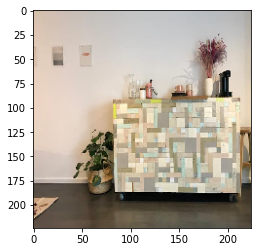

In [12]:
img, x = load_image("data/images_one_folder/49688506_2.jpg")
plt.imshow(img)

Now we can use the variable x, which is used to store the vectors of the images in one batch, to forward our image(s) to the network. Our model can make predictions based on the provided vectors. These predictions can be decoded to something readable for us with the `decode_predictions` function. The output of the cell below is the prediction based on what is captured on the image.

In [13]:
predictions = model.predict(x)

for _, pred, prob in decode_predictions(predictions)[0]:
    print("predicted %s with probability %0.3f" % (pred, prob))

predicted desk with probability 0.164
predicted carton with probability 0.147
predicted dining_table with probability 0.068
predicted bookcase with probability 0.051
predicted library with probability 0.047


### Extract features from an image

We make use again from the pre-trained feature_extractor model that we already used in section *2/3 - FINDING SIMILAR AND DUPLICATE LISTINGS BASED ON THE IMAGES*. This model has a function `predict` that is very useful for us.

In [14]:
feat_extractor = Model(inputs=model.input, outputs=model.get_layer("fc2").output)

We will now load the path names of the images that we will use in the feature extraction.

In [15]:
images_path = 'data/images_one_folder/'
image_extensions = ['.jpg', '.jpeg', '.png']

images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(images_path) for f in filenames if os.path.splitext(f)[1].lower() in image_extensions]
print("%d images to analyze" % len(images))

10239 images to analyze


The next step will extract the feature vector from each image. These feature vectors are stored in a file along with the PCA and its features. This file can be used later in Part 2 of this task.<br><br>
Principal component analysis (PCA) projects our image data into a lower dimensional space. More information about PCA is already given in section *2/3 - FINDING SIMILAR AND DUPLICATE LISTINGS BASED ON THE IMAGES*.<br><br>
We make use of PCA to improve the accuracy and cut down the runtime. If we don't make use of PCA here, then in part 2 of this task the t-SNE function will need more processing time because it is less efficient.

**NOTE**: We commented out these cells because it takes too long to rerun.

In [19]:
# features = []
# for i, image_path in enumerate(images):
#     img, x = load_image(image_path);
#     feat = feat_extractor.predict(x)[0]
#     features.append(feat)

# print('finished extracting features for %d images' % len(images))

# features = np.array(features)
# pca = PCA(n_components=50)
# pca.fit(features)
# pca_features = pca.transform(features)

In [17]:
# pickle.dump([images, pca_features, pca], open('data/features/features_from_one_folder.p', 'wb'))

References for this task:
* https://github.com/ml4a/ml4a/blob/master/examples/info_retrieval/image-search.ipynb
* https://github.com/ml4a/ml4a/blob/master/examples/info_retrieval/image-tsne.ipynb